In [21]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import cifar10
from keras.models import Sequential 
from keras.layers import Dense 
from keras.callbacks import EarlyStopping 
#from tensorflow.keras.utils import to_categorical

In [22]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train_final = x_train.reshape((-1, 3072)) /255
x_test_final = x_test.reshape((-1, 3072)) /255
#y_train_final = to_categorical(y_train)
#y_test_final = to_categorical(y_test)
y_train_final = y_train
y_test_final = y_test

170508288/170498071 [==============================] - 9s 0us/step


In [26]:
model = Sequential() 
model.add(Dense(512, kernel_initializer='normal', activation='relu', input_shape=(3072,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [27]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

In [28]:
history = model.fit(x_train_final, y_train_final, batch_size=256, epochs=50, verbose=1, validation_split = 0.2, callbacks = [EarlyStopping(monitor = 'val_loss', patience = 20)])

Epoch 1/50
157/157 [==============================] - 2s 8ms/step - loss: 2.3325 - accuracy: 0.2124 - val_loss: 1.9830 - val_accuracy: 0.2571
Epoch 2/50
157/157 [==============================] - 1s 6ms/step - loss: 1.9411 - accuracy: 0.2996 - val_loss: 1.8915 - val_accuracy: 0.3223
Epoch 3/50
157/157 [==============================] - 1s 5ms/step - loss: 1.8279 - accuracy: 0.3419 - val_loss: 1.7358 - val_accuracy: 0.3819
Epoch 4/50
157/157 [==============================] - 1s 5ms/step - loss: 1.7507 - accuracy: 0.3708 - val_loss: 1.7783 - val_accuracy: 0.3633
Epoch 5/50
157/157 [==============================] - 1s 5ms/step - loss: 1.6876 - accuracy: 0.3916 - val_loss: 1.7861 - val_accuracy: 0.3630
Epoch 6/50
157/157 [==============================] - 1s 5ms/step - loss: 1.6408 - accuracy: 0.4132 - val_loss: 1.7851 - val_accuracy: 0.3800
Epoch 7/50
157/157 [==============================] - 1s 5ms/step - loss: 1.5996 - accuracy: 0.4261 - val_loss: 1.8001 - val_accuracy: 0.3611
Epoch 

In [29]:
score = model.evaluate(x_test_final, y_test_final, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 2.134387493133545
Test accuracy: 0.4462999999523163


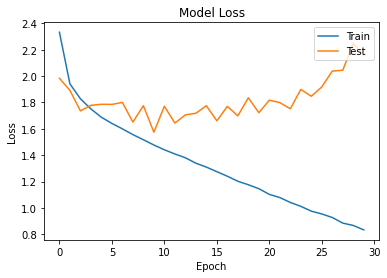

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

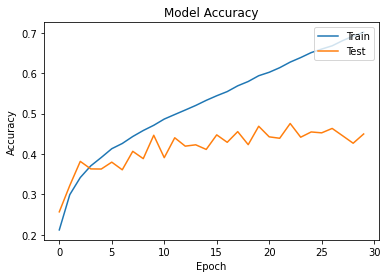

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()